# Mobile Price Range Classification with ANN

In this project, we will use Artificial Neural Networks (ANN) to classify mobile phones into different price ranges based on their features. Mobile phones are one of the most popular electronic devices, and setting the right price for them can be a challenging task, especially for new businesses trying to compete with big brands like Samsung and Apple. In this case study, Mr. Aman is planning to start his own mobile phone company but is unsure about how to price his products. Instead of predicting the exact price, we will train a machine learning model to classify mobiles into different price categories. This classification will help businesses understand where their products should fall in the market.


So, since our task is to classify the price range of mobile phones and not to predict the actual prices, so here I am going to train a classification model to classify the price range of mobile phones as:

+ 0 (low cost)
+ 1 (medium cost)
+ 2 (high cost)
+ 4 (very high cost)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tlf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [4]:
url= "https://raw.githubusercontent.com/amankharwal/Website-data/master/mobile_prices.csv"

In [5]:
df = pd.read_csv(url)

In [6]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

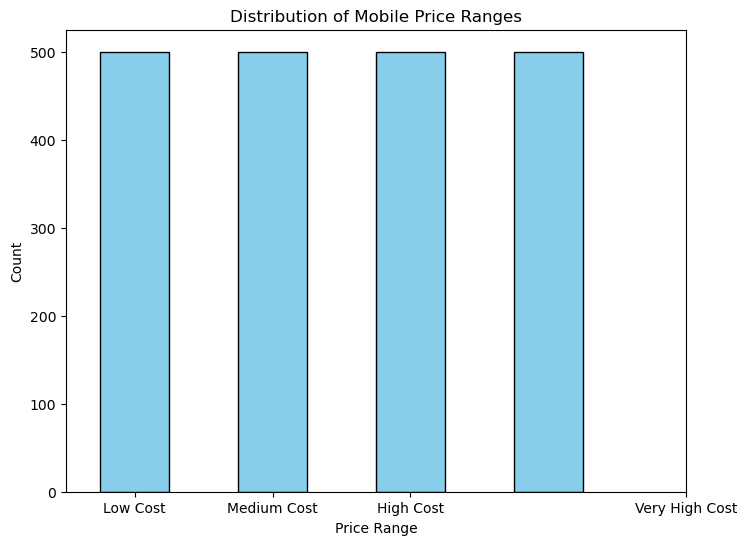

In [8]:
plt.figure(figsize=(8, 6))
df['price_range'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Mobile Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 4], labels=['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'], rotation=0)
plt.show()

+ equal

In [10]:
x= df.drop(["price_range"],axis=1)
y = df["price_range"]

In [11]:
# standardizaiton for units
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size= .30 , random_state= 42)

In [13]:
model= Sequential()
model.add(Dense(120, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dropout(.20))
model.add(Dense(32, activation="relu"))
model.add(Dropout(.20))
model.add(Dense(6, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(optimizer = "adam",
              loss= "sparse_categorical_crossentropy",
              metrics= ["accuracy"]
              )


In [14]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=65)

Epoch 1/65
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2627 - loss: 1.3849 - val_accuracy: 0.3533 - val_loss: 1.3271
Epoch 2/65
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3661 - loss: 1.3251 - val_accuracy: 0.4600 - val_loss: 1.2510
Epoch 3/65
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4273 - loss: 1.2515 - val_accuracy: 0.4767 - val_loss: 1.1540
Epoch 4/65
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4461 - loss: 1.1646 - val_accuracy: 0.5017 - val_loss: 1.0484
Epoch 5/65
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4845 - loss: 1.0612 - val_accuracy: 0.5117 - val_loss: 0.9493
Epoch 6/65
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5139 - loss: 0.9637 - val_accuracy: 0.5533 - val_loss: 0.8599
Epoch 7/65
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5421 - loss: 0.9048 - val_accuracy: 0.7833 - val_loss: 0.6981
Epoch 8/65
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6760 - loss: 0.7645 - val_accuracy: 0.7600 - val_loss

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │           2,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           7,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             198 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              28 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,712 (147.32 KB)

 Trainable params: 12,570 (49.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,142 (98.21 KB)

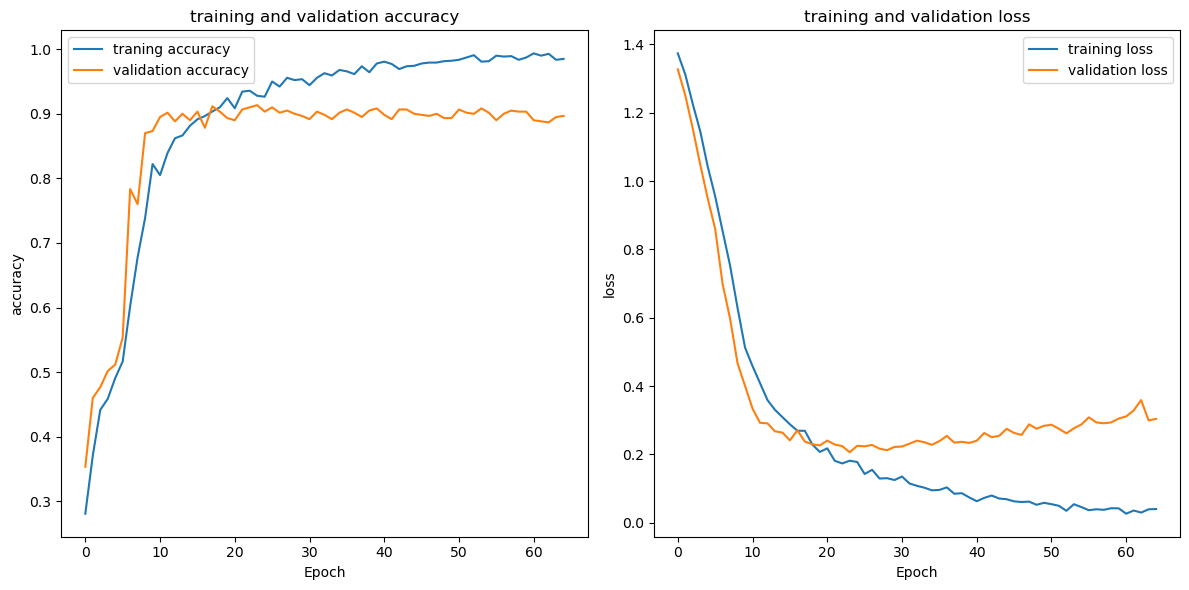

In [16]:
# Training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1
plt.plot(history.history["accuracy"], label="traning accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.title("training and validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend()

# Training and validation loss
plt.subplot(1, 2, 2)  
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.title("training and validation loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()

plt.tight_layout()
plt.show()


## Conclusion

In this project, we developed an ANN model to classify mobile phones into price ranges, achieving a 98.6% accuracy. This demonstrates the model's effectiveness in predicting price categories based on features, making it a useful tool for businesses in setting competitive prices.
